# Ciência dos Dados - Projeto 1


## Introdução 

Esse trabalho tem como objetivo a aprendizagem de analisar dados através de ferramentas estatísticas e computacionais. Para atingi-lo, utilizamos três variáveis para ver a correlação entre elas. A principal é o Índice de Desenvolvimento Humano (IDH), que é composto por expectativa de vida, educação e o PIB per capita do país que está sendo analisado. Porém, nesse trabalho foram analisados diversos países em um determinado período, nesse caso, o ano de 2009. Formulamos uma pergunta sobre o IDH com relação as outras duas variáveis escolhidas e a resposta para a mesma tem que ser encontrada nos dados analisados.

** Nome:** Gabriel Miras Floriano

**Pergunta:** Como uma elevada população urbana e um setor de serviços desenvolvido ﻿interferem no IDH?﻿

# IDH, População Urbana e Setor de Serviços
Foram coletados três dados do site https://www.gapminder.org/, sendo que um deles foi definido pelo professor e os outros dois foram de livre escolha dos alunos:

1. IDH (Índice de Desenvolvimento Humano)
2. População Urbana (% do total)
3. Setor de Serviços (% do PIB)

Nesses dataframes, as linhas representam os países e as colunas representam o ano.

Como os arquivos estão separados, será preciso juntá-los cruzando o país, restringindo a análise do ano 2009.

## Imports ##

In [16]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns

## Leitura dos arquivos

In [17]:
#Leitura dos arquivos em excel
hdi = pd.read_excel('Indicator_HDI.xlsx')
UP = pd.read_excel('UP.xlsx')
S = pd.read_excel('S.xlsx')

# IDH

É possível verificar que cada linha representa um país e as colunas representam o ano.

In [18]:
hdi= hdi.loc[:, ["HDI", 2009]]
hdi = hdi.rename(columns = {'HDI':'País', 2009:'IDH em 2009'})
hdi.head(11)

,País,IDH em 2009
0,Abkhazia,NaN
1,Afghanistan,0.387
2,Akrotiri and Dhekelia,NaN
3,Albania,0.734
4,Algeria,0.691
5,American Samoa,NaN
6,Andorra,NaN
7,Angola,0.481
8,Anguilla,NaN
9,Antigua and Barbuda,NaN


# População Urbana

É possível verificar que cada linha representa um país e as colunas representam o ano.

In [19]:
UP= UP.loc[:, ["Urban population (% of total)", '2009']]
UP = UP.rename(columns = {"Urban population (% of total)":'País', '2009':'População Urbana em 2009 (%)'})
UP.head(11)

,País,População Urbana em 2009 (%)
0,Abkhazia,NaN
1,Afghanistan,22.9676
2,Akrotiri and Dhekelia,NaN
3,Albania,51.2184
4,Algeria,70.9570
5,American Samoa,92.6390
6,Andorra,88.3126
7,Angola,57.4918
8,Anguilla,NaN
9,Antigua and Barbuda,30.0322


# Setor de Serviços

É possível verificar que cada linha representa um país e as colunas representam o ano.

In [20]:
S= S.loc[:, ["Services, etc., value added (% of GDP)", '2009']]
S = S.rename(columns = {'Services, etc., value added (% of GDP)':'País', '2009':'Setor de Serviços em 2009 (%)'})
S.head(11)

,País,Setor de Serviços em 2009 (%)
0,Afghanistan,47.607657
1,Albania,60.239255
2,Algeria,30.960967
3,American Samoa,NaN
4,Andorra,NaN
5,Angola,30.751248
6,Antigua and Barbuda,76.285758
7,Argentina,60.697484
8,Armenia,45.280450
9,Aruba,NaN


# Junção das tabelas

In [21]:
df = hdi.join(UP, how='inner', lsuffix='hdi', rsuffix='2009')
df.head(11)

,Paíshdi,IDH em 2009,País2009,População Urbana em 2009 (%)
0,Abkhazia,NaN,Abkhazia,NaN
1,Afghanistan,0.387,Afghanistan,22.9676
2,Akrotiri and Dhekelia,NaN,Akrotiri and Dhekelia,NaN
3,Albania,0.734,Albania,51.2184
4,Algeria,0.691,Algeria,70.9570
5,American Samoa,NaN,American Samoa,92.6390
6,Andorra,NaN,Andorra,88.3126
7,Angola,0.481,Angola,57.4918
8,Anguilla,NaN,Anguilla,NaN
9,Antigua and Barbuda,NaN,Antigua and Barbuda,30.0322


In [22]:
data = df.join(S, how="inner", lsuffix = ' ', rsuffix = ' ')
data.head(11)

,Paíshdi,IDH em 2009,País2009,População Urbana em 2009 (%),País,Setor de Serviços em 2009 (%)
0,Abkhazia,NaN,Abkhazia,NaN,Afghanistan,47.607657
1,Afghanistan,0.387,Afghanistan,22.9676,Albania,60.239255
2,Akrotiri and Dhekelia,NaN,Akrotiri and Dhekelia,NaN,Algeria,30.960967
3,Albania,0.734,Albania,51.2184,American Samoa,NaN
4,Algeria,0.691,Algeria,70.9570,Andorra,NaN
5,American Samoa,NaN,American Samoa,92.6390,Angola,30.751248
6,Andorra,NaN,Andorra,88.3126,Antigua and Barbuda,76.285758
7,Angola,0.481,Angola,57.4918,Argentina,60.697484
8,Anguilla,NaN,Anguilla,NaN,Armenia,45.280450
9,Antigua and Barbuda,NaN,Antigua and Barbuda,30.0322,Aruba,NaN


In [23]:
writer = pd.ExcelWriter('Projeto1.xlsx')
data.to_excel(writer,'data')
writer.save()

# Gráficos
Está parte está designada para a amostragem dos dados em formato de gráficos para um melhor entendimento e uma melhor análise.

## IDH e População Urbana

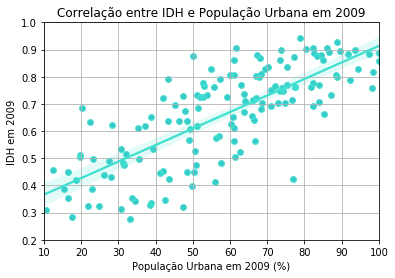

('A correlação entre o IDH em 2009 e a população urbana em 2009 é:',
 0.7636087451596548)

In [24]:
data.plot.scatter(x='População Urbana em 2009 (%)',y='IDH em 2009');
sns.regplot(data["População Urbana em 2009 (%)"],data["IDH em 2009"], color=('turquoise'))
plt.axis([10, 100, 0.2, 1])
plt.title("Correlação entre IDH e População Urbana em 2009")
plt.grid()
plt.show()
'A correlação entre o IDH em 2009 e a população urbana em 2009 é:', data['IDH em 2009'].corr(data['População Urbana em 2009 (%)'])

O gráfico acima nos diz a correlação entre as variáveis de IDH e População Urbana. Como se pode ver, a correlação é forte, com um resultado de 0.7636087451596548, sendo que quanto mais próximo de 1 maior a correlação entre eles. Isso acontece pois em populações urbanas, geralmente, há um desenvolvimento e integração econômico superior e os sistemas de saúde e educação são mais avançados, o que faz o IDH elevar.

## IDH e Setor de Serviços

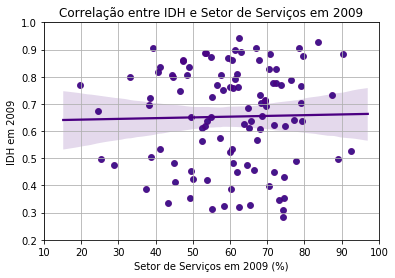

A correlação entre o IDH em 2009 e o setor de serviços em 2009 é: 0.021909223026682162


In [25]:
data.plot.scatter(x='Setor de Serviços em 2009 (%)',y='IDH em 2009');
sns.regplot(data["Setor de Serviços em 2009 (%)"],data["IDH em 2009"], color=('indigo'))
plt.axis([10, 100, 0.2, 1])
plt.title("Correlação entre IDH e Setor de Serviços em 2009")
plt.grid()
plt.show()
print('A correlação entre o IDH em 2009 e o setor de serviços em 2009 é:', data['IDH em 2009'].corr(data['Setor de Serviços em 2009 (%)']))

O gráfico acima nos diz a correlação entre as variáveis de IDH e Setor de Serviços. Como se pode ver, a correlação é fraca, com um resultado de 0.021909223026682162, sendo que quanto mais próximo de 0 pior a correlação entre eles. Um país pode possuir um setor terciário bem desenvolvido, mas com um PIB per capita baixo, o que resultará em pouco efeito no cálculo do IDH. Outro fator é de que o país pode ser muito bem desenvolvido, porém é um grande importador, que pode acarretar em um setor terciário pouco desenvolvido.

## Setor de Serviços e População Urbana

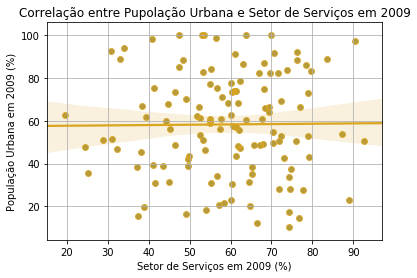

A correlação entre o setor de serviços em 2009 e a população Urbana em 2009  é: 0.009760147212070417


In [26]:
data.plot.scatter(x='Setor de Serviços em 2009 (%)',y='População Urbana em 2009 (%)');
sns.regplot(data["Setor de Serviços em 2009 (%)"],data["População Urbana em 2009 (%)"], color=('goldenrod'))
plt.title("Correlação entre Pupolação Urbana e Setor de Serviços em 2009")
plt.grid()
plt.show()
print('A correlação entre o setor de serviços em 2009 e a população Urbana em 2009  é:', data['Setor de Serviços em 2009 (%)'].corr(data['População Urbana em 2009 (%)']))

O gráfico acima nos diz a correlação entre as variáveis de Setor de Serviços e População. Como se pode ver, a correlação é muito fraca, com um resultado de 0.009760147212070417. Diferente da hipótese criada, a qual era de com uma maior população urbana o requerimento de serviços seria muito elevado, os dados mostram que países com uma população urbana elevada podem ter seu setor de serviços ameno.

## IDH em 2009

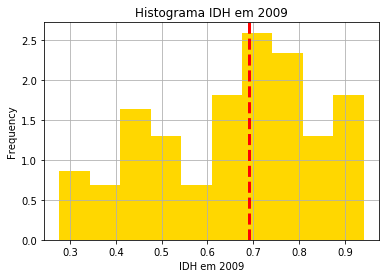

In [27]:
hdi["IDH em 2009"].plot.hist(density = True, color= 'gold')
hdi["IDH em 2009"].describe()
plt.axvline(hdi['IDH em 2009'].median(), color= 'r', linestyle= 'dashed', linewidth= 3)
plt.title("Histograma IDH em 2009")
plt.xlabel("IDH em 2009")
plt.grid()
plt.show()

Como se pode observar o gráfico acima é assimétrico negativo, onde há uma maior concentração na faixa entre 0.7 e 0.8 do índice do IDH no ano de 2009.

## População Urbana em 2009

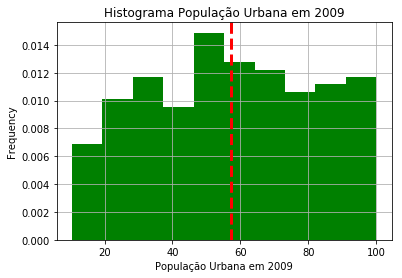

In [28]:
UP["População Urbana em 2009 (%)"].plot.hist(density = True, color = 'green')
UP["População Urbana em 2009 (%)"].describe()
plt.axvline(UP['População Urbana em 2009 (%)'].median(), color= 'r', linestyle= 'dashed', linewidth= 3)
plt.title("Histograma População Urbana em 2009")
plt.xlabel("População Urbana em 2009")
plt.grid()
plt.show()

O gráfico acima nos mostra que a população está bem distribuída, com uma frequência maior entre 45% e 50%. Pode verificar também que é um gráfico assimétrico positivo.

## Setor de Serviços em 2009

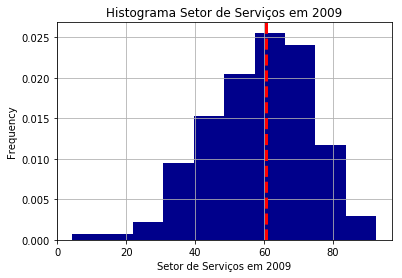

In [30]:
S["Setor de Serviços em 2009 (%)"].plot.hist(density = True, color = 'darkblue')
S["Setor de Serviços em 2009 (%)"].describe()
plt.axvline(S['Setor de Serviços em 2009 (%)'].median(), color= 'r', linestyle= 'dashed', linewidth= 3)
plt.title("Histograma Setor de Serviços em 2009")
plt.xlabel("Setor de Serviços em 2009")
plt.grid()
plt.show()

In [ ]:
simetrico


# Conclusão

Com os dados e gráficos analisados, podemos dizer que quanto maior o desenvolvimento da urbanização de um país, um maior acesso a escolas e hospitais as pessoas terão, o que em um mundo idealizado, resultaria em maiores investimentos em educação e saúde. Como o cálculo do IDH não envolve ordens ecológicas, um país possuir mais áreas urbanizadas e menos áreas ruralizadas o colocará em uma melhor posição no ranking do IDH. Já com um setor de serviços bem desenvolvido os produtos que chegam aos clientes são de boa qualidade, além da diminuição de desemprego.